In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
len(y_train)

60000

In [8]:
len(y_test)

10000

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# X_train = X_train/ 255
# X_test = X_test/ 255   # scaling for accurcy it increase the score of prediction

In [13]:
# first we must have to flattend our data 2d into the 1d array.. 
#bcz neurons in neuron network takes only 1d array for the prediction and train and testing

In [14]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

In [15]:
X_test_flattend.shape

(10000, 784)

In [16]:
# successfully converted 2d into the 1d array
X_test_flattend[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [17]:

X_train_flattend.shape

(60000, 784)

In [18]:
X_train_flattend[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [19]:
# visualisation for train and test data

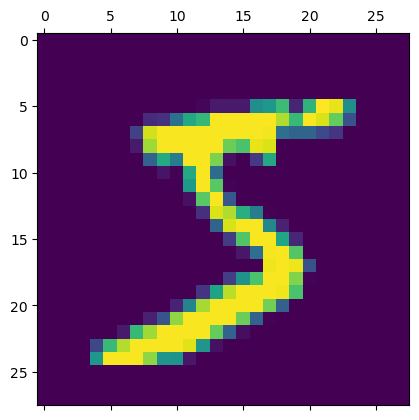

In [20]:
plt.matshow(X_train[0])

In [21]:
# comparing prdiction to the actual data

In [22]:
y_train[0]

5

In [23]:
# after convertion on 2d array into the 1d array training proccess of neural network started

In [24]:
# in this neurol network code we only train and predict accornding to the only one neuron there are not any hidden layer of neurons 

In [25]:
# Sequential = having stack of layers in neural network
# Dense  = each neurons of input layer are connnected to the each neurons of output layer
#    or when each layer of neurons in network are connected with another layer of neurons are called Dense.....


model = keras.Sequential([
    # Dense(total output layer, total input layer, activation function= 'sigmoid')
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattend, y_train, epochs = 5)

Epoch 1/5


C:\Users\mdhar_hxm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.7700 - loss: 17.1634
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 6.4400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8840 - loss: 5.6314
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8847 - loss: 5.3123
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8890 - loss: 5.2097


In [26]:
# here our prediction is evaluated and nicelly returns prediction by our neurons
# we must have to evaluate our test same as ml algo fit methode to check and fit our test medule data

model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8552 - loss: 6.8326


[6.062490463256836, 0.8740000128746033]

In [27]:
prediction= model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
prediction

array([[1.0168388e-27, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 9.9934536e-01,
        1.0000000e+00, 9.9998772e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        7.3232918e-08, 1.4861777e-27]], dtype=float32)

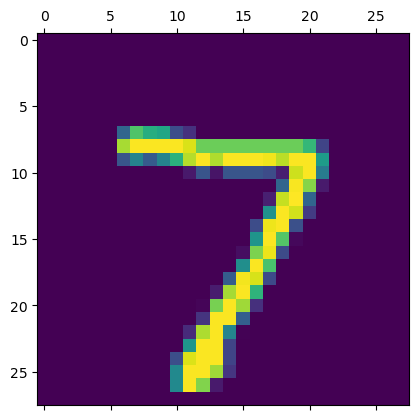

In [29]:
# lets play around the the test and the prediction... and check predition accuracy of our model

plt.matshow(X_test[0])

In [30]:
prediction[0]

array([1.0168388e-27, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0373478e-37, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [31]:
np.argmax(prediction[0])

2

In [32]:
# lets predict the value according to the X_train and train

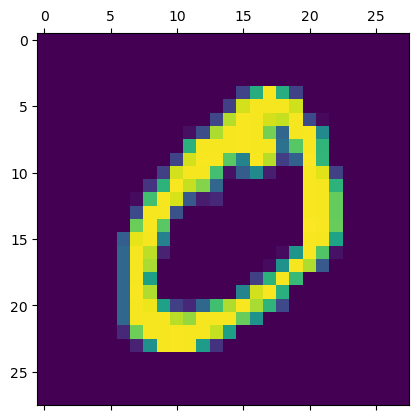

In [33]:
plt.matshow(X_train[1])

In [34]:
prediction[1]

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [35]:
np.argmax(prediction[1])

0

In [36]:
# lets make the confusion matrix for comparing the prediction value with the actual value

In [37]:
prediction
# our prediction return the whole number and y_test is a natural number or return in intezer


array([[1.0168388e-27, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 9.9934536e-01,
        1.0000000e+00, 9.9998772e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        7.3232918e-08, 1.4861777e-27]], dtype=float32)

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
# for comparison in confusion matrix first we have to convert whole number into the intezer form 

y_prediction = [np.argmax(i) for i in prediction]

In [40]:
y_prediction[:10]

[2, 0, 1, 0, 2, 1, 4, 1, 0, 4]

In [41]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [42]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_prediction)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    3,    1,    1,    2,    0,    0,    0,    0],
       [   3, 1131,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 257,  417,  353,    3,    2,    0,    0,    0,    0,    0],
       [ 256,  328,  379,   47,    0,    0,    0,    0,    0,    0],
       [  33,  156,  455,  101,  236,    1,    0,    0,    0,    0],
       [ 258,   75,  302,  125,   45,   86,    1,    0,    0,    0],
       [ 175,  158,  616,    6,    2,    0,    1,    0,    0,    0],
       [  51,  152,  370,  402,   34,   14,    0,    4,    1,    0],
       [  95,  539,  296,    9,    7,   28,    0,    0,    0,    0],
       [  28,  140,  401,  324,  115,    0,    0,    1,    0,    0]])>

Text(95.72222222222221, 0.5, 'truth')

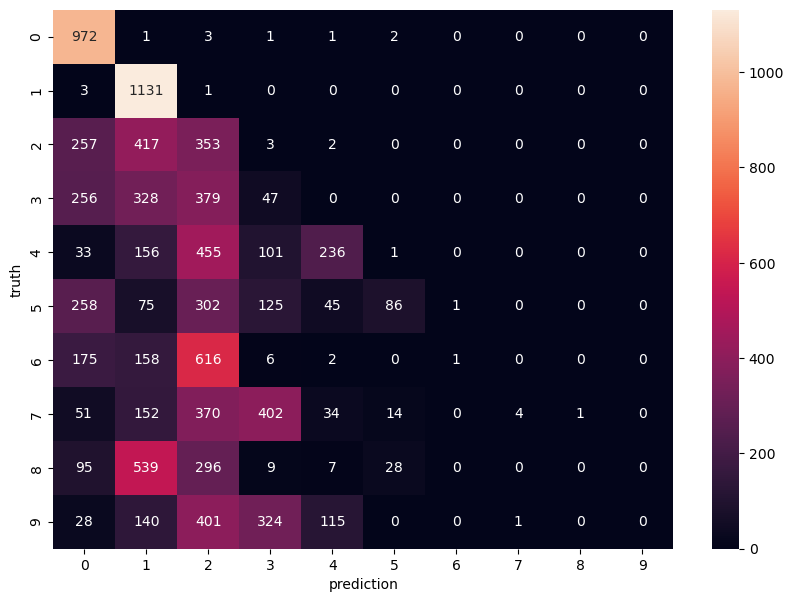

In [43]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = cm , fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')

In [44]:
# neural network with hidden layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),  # here 100 is nothing but the hidden layer with 100 neurons
    keras.layers.Dense(10, activation = 'sigmoid')    # here 10 is nothing but the output layer with 10 neurons
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattend,y_train, epochs = 5)

Epoch 1/5


C:\Users\mdhar_hxm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7704 - loss: 7.0644
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8885 - loss: 0.4288
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9185 - loss: 0.3025
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9298 - loss: 0.2534
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9372 - loss: 0.2284


In [45]:
model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.3001


[0.2651222050189972, 0.9409999847412109]

In [46]:
prediction_hidden_layer = model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


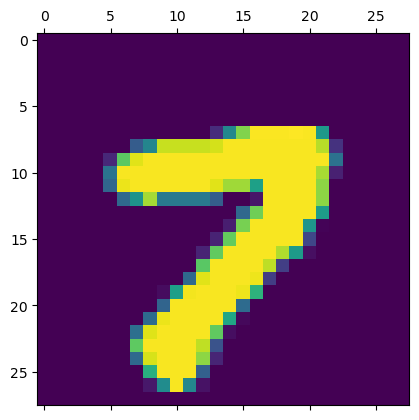

In [47]:
plt.matshow(X_test[79])

In [48]:
prediction_hidden_layer[79]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [49]:
np.argmax(prediction_hidden_layer[79])

0

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
# same code with not apply flattend in 2d array by operation keras do it in easy way....

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # keras automatically flattend the X_train 2d array data into the 1d 
    keras.layers.Dense(100, activation='relu'),  # after flatten there are no need to write code for the input_shape as other neural code see in previous code....
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


C:\Users\mdhar_hxm\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8077 - loss: 6.8412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8922 - loss: 0.4253
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9216 - loss: 0.2957
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9315 - loss: 0.2707
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9395 - loss: 0.2342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9427 - loss: 0.2196
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9467 - loss: 0.2070
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9499 - loss: 0.1984
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9521 - loss: 0.1832
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9542 - loss: 0.1757


In [52]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.2995


[0.2569397985935211, 0.9455000162124634]

In [53]:
with_flattend_by_keras = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
with_flattend_by_keras

array([[4.9479435e-31, 3.7733909e-05, 3.3568558e-03, ..., 9.9893790e-01,
        5.1076083e-12, 1.6668944e-10],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.3814606e-09, 9.9999982e-01, 4.1084787e-01, ..., 4.7579236e-02,
        7.2317350e-01, 3.3739086e-02],
       ...,
       [0.0000000e+00, 1.2751743e-05, 8.2760191e-01, ..., 9.9998790e-01,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 9.9999756e-01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999988e-01, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)